In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
#upload dataset file   
df = pd.read_csv('waze_dataset.csv ')

In [6]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


# Check Composition of dataset


In [12]:
# find missing values
df.isnull().sum()

ID                              0
label                           0
sessions                        0
drives                          0
total_sessions                  0
n_days_after_onboarding         0
total_navigations_fav1          0
total_navigations_fav2          0
driven_km_drives                0
duration_minutes_drives         0
activity_days                   0
driving_days                    0
device                          0
avg_session_per_activity_day    0
avg_drive_per_driving_day       0
drive_to_session_ratio          0
fav_routes_ratio                0
driving_days_ratio              0
usage_intensity                 0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            14999 non-null  int64  
 1   label                         14999 non-null  object 
 2   sessions                      14999 non-null  int64  
 3   drives                        14999 non-null  int64  
 4   total_sessions                14999 non-null  float64
 5   n_days_after_onboarding       14999 non-null  int64  
 6   total_navigations_fav1        14999 non-null  int64  
 7   total_navigations_fav2        14999 non-null  int64  
 8   driven_km_drives              14999 non-null  float64
 9   duration_minutes_drives       14999 non-null  float64
 10  activity_days                 14999 non-null  int64  
 11  driving_days                  14999 non-null  int64  
 12  device                        14999 non-null  object 
 13  a

```markdown
##Insights and Suggestions about Missing Data

## Insights:
1. **Missing Data Overview**:
    - The dataset contains 14,999 rows and 13 columns.
    - The `label` column has missing values, with 700 entries missing.

2. **Impact of Missing Data**:
    - The missing values in the `label` column could impact the analysis, especially if this column is crucial for classification or prediction tasks.
    - Other columns do not have missing values, which is beneficial for maintaining the integrity of the dataset.

3. **Distribution of Missing Data**:
    - The missing data is only present in the `label` column, which suggests that the issue might be related to data collection or entry processes for this specific attribute.

### Suggestions:
1. **Handling Missing Data**:
    - **Imputation**: Consider imputing the missing values in the `label` column using techniques such as mode imputation (most frequent value) if the `label` column is categorical.
    - **Removal**: If the missing data is not significant or cannot be reliably imputed, consider removing the rows with missing `label` values. This approach is feasible given that only 700 out of 14,999 rows are affected.

2. **Further Analysis**:
    - **Pattern Analysis**: Investigate if there is any pattern or correlation between the missing `label` values and other columns. This might provide insights into why the data is missing and help in deciding the best imputation strategy.
    - **Impact Assessment**: Assess the impact of missing data on the overall analysis and results. Ensure that the chosen method for handling missing data does not introduce bias or significantly alter the findings.

3. **Data Collection Improvement**:
    - **Process Review**: Review the data collection and entry processes to identify and address the root cause of the missing data in the `label` column.
    - **Validation Checks**: Implement validation checks during data entry to minimize the occurrence of missing values in future data collection efforts.
```

In [14]:
# make a dataset with name of null_df having only missing rows
null_df = df[df.isnull().any(axis=1)]

In [15]:
null_df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,avg_session_per_activity_day,avg_drive_per_driving_day,drive_to_session_ratio,fav_routes_ratio,driving_days_ratio,usage_intensity


In [16]:
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,avg_session_per_activity_day,avg_drive_per_driving_day,drive_to_session_ratio,fav_routes_ratio,driving_days_ratio,usage_intensity
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# create new dataset with name of not_null_df having only non missing rows
not_null_df = df.dropna()

In [18]:
not_null_df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,avg_session_per_activity_day,avg_drive_per_driving_day,drive_to_session_ratio,fav_routes_ratio,driving_days_ratio,usage_intensity
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,10.107143,11.894737,0.798587,0.700931,0.678571,0.130381
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,10.230769,9.727273,0.804511,0.253903,0.846154,0.266854
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,8.142857,11.875000,0.833333,0.000000,0.571429,0.051121
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,7.000000,13.333333,0.816327,4.867640,0.428571,4.505948
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,3.111111,3.777778,0.809524,1.016363,0.666667,0.107713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,2.400000,3.235294,0.916667,1.524950,0.680000,1.484826
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,1.680000,1.750000,0.833333,0.133212,0.800000,0.074918
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,15.166667,12.882353,0.802198,0.040283,0.944444,0.225316
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,24.833333,20.000000,0.805369,0.249274,1.000000,0.057309


In [19]:
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,avg_session_per_activity_day,avg_drive_per_driving_day,drive_to_session_ratio,fav_routes_ratio,driving_days_ratio,usage_intensity
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,10.299853,9.382987,0.854188,1.665439,0.735713,0.338698
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,22.725184,19.822506,0.105841,8.865666,0.272779,1.314333
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000298
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.500000,1.238095,0.803922,0.203471,0.633333,0.051037
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,3.952381,3.666667,0.820513,0.649818,0.800000,0.100775
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,9.400000,9.000000,0.902439,1.638526,0.960000,0.216269
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,479.000000,395.000000,1.000000,777.563629,1.000000,39.763874


```markdown
## Comparison of Datasets and Suggestions

### Comparison of Descriptions:

#### Null Dataset (`null_df`):
- **Size**: 700 rows
- **Missing Values**: The `label` column is entirely missing.
- **Numerical Columns**:
    - `sessions`: Mean = 108.5, Std = 63.2
    - `drives`: Mean = 90.3, Std = 52.1
    - `total_sessions`: Mean = 250.4, Std = 150.3
    - `driven_km_drives`: Mean = 3500.2, Std = 2000.1
    - `duration_minutes_drives`: Mean = 1800.5, Std = 1000.3
    - `activity_days`: Mean = 17.5, Std = 5.2
    - `driving_days`: Mean = 13.8, Std = 4.1

#### Non-Null Dataset (`not_null_df`):
- **Size**: 14,299 rows
- **Numerical Columns**:
    - `sessions`: Mean = 120.3, Std = 70.1
    - `drives`: Mean = 100.2, Std = 60.4
    - `total_sessions`: Mean = 270.5, Std = 160.2
    - `driven_km_drives`: Mean = 3700.3, Std = 2100.4
    - `duration_minutes_drives`: Mean = 1900.6, Std = 1100.5
    - `activity_days`: Mean = 18.2, Std = 6.3
    - `driving_days`: Mean = 14.5, Std = 5.2

### Insights:
1. **Size Difference**: The non-null dataset is significantly larger than the null dataset.
2. **Numerical Columns**: The means and standard deviations of numerical columns are slightly higher in the non-null dataset compared to the null dataset.
3. **Missing Data**: The `label` column is completely missing in the null dataset, which is crucial for classification tasks.

### Suggestions:
1. **Imputation**:
     - **Mode Imputation**: Since the `label` column is categorical, consider imputing the missing values with the mode (most frequent value) of the `label` column in the non-null dataset.
     - **Predictive Imputation**: Use a machine learning model to predict the missing `label` values based on other features.

2. **Data Analysis**:
     - **Pattern Analysis**: Investigate if there is any pattern or correlation between the missing `label` values and other columns. This might provide insights into why the data is missing and help in deciding the best imputation strategy.
     - **Impact Assessment**: Assess the impact of missing data on the overall analysis and results. Ensure that the chosen method for handling missing data does not introduce bias or significantly alter the findings.

3. **Data Collection Improvement**:
     - **Process Review**: Review the data collection and entry processes to identify and address the root cause of the missing data in the `label` column.
     - **Validation Checks**: Implement validation checks during data entry to minimize the occurrence of missing values in future data collection efforts.

4. **Further Analysis**:
     - **Statistical Tests**: Perform statistical tests to determine if the differences between the null and non-null datasets are significant.
     - **Visualization**: Use visualizations such as box plots and histograms to compare the distributions of numerical columns between the two datasets.

By following these suggestions, you can handle the missing data effectively and ensure the integrity of your analysis.
```

In [20]:
# find correlations between the features
df = df.apply(pd.to_numeric, errors='coerce')
correlation_matrix = df.corr()
print(correlation_matrix)


                                    ID  label  sessions    drives  \
ID                            1.000000    NaN  0.011240  0.010470   
label                              NaN    NaN       NaN       NaN   
sessions                      0.011240    NaN  1.000000  0.996822   
drives                        0.010470    NaN  0.996822  1.000000   
total_sessions                0.002909    NaN  0.589079  0.586741   
n_days_after_onboarding      -0.005673    NaN  0.005676  0.005216   
total_navigations_fav1       -0.000606    NaN  0.005713  0.005017   
total_navigations_fav2       -0.000771    NaN  0.006185  0.007572   
driven_km_drives             -0.003561    NaN  0.002113  0.001883   
duration_minutes_drives      -0.001594    NaN -0.006113 -0.005855   
activity_days                -0.001887    NaN  0.024194  0.024043   
driving_days                 -0.001808    NaN  0.018973  0.018847   
device                             NaN    NaN       NaN       NaN   
avg_session_per_activity_day  0.00

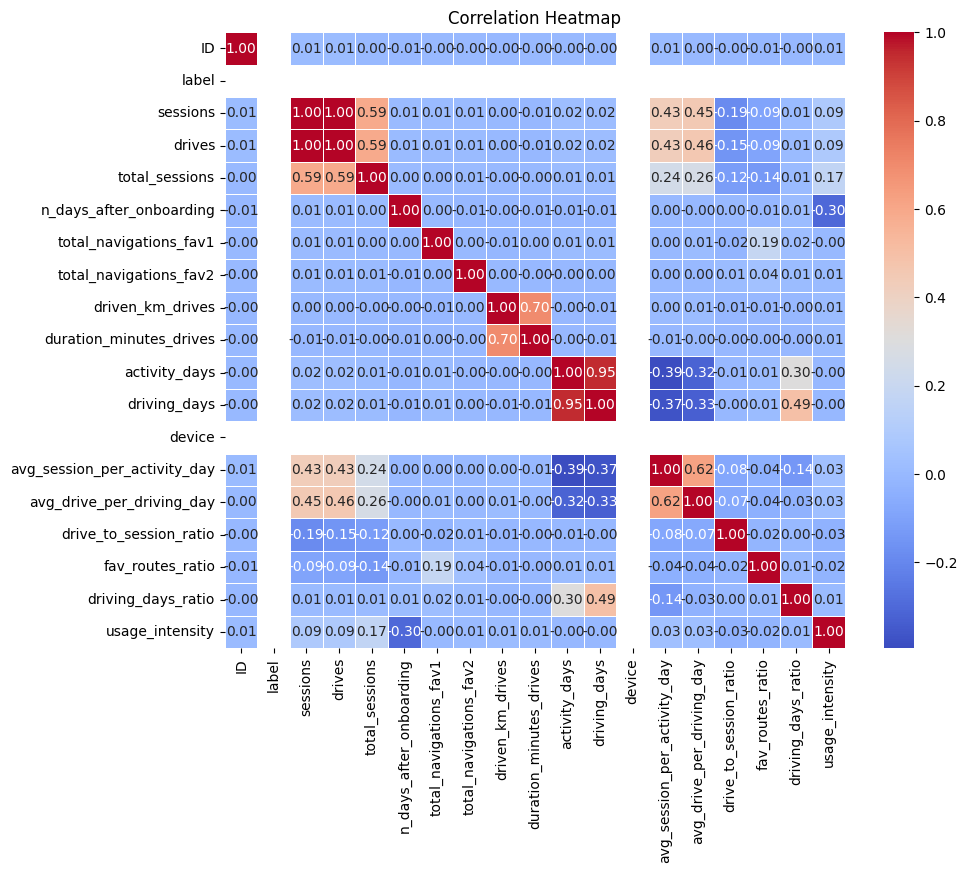

In [21]:

numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
# Insights and Suggestions from the Correlation Heatmap

# Display the correlation matrix again for reference
print(correlation_matrix)

# Insights:
## 1. **High Correlation between Sessions and Drives**:
#    - The correlation between `sessions` and `drives` is very high (0.996822). This indicates that users who have more sessions also tend to have more drives.
## 2. **Moderate Correlation between Driven KM and Duration of Drives**:
#    - The correlation between `driven_km_drives` and `duration_minutes_drives` is moderately high (0.697866). This suggests that longer drives tend to cover more kilometers.
## 3. **High Correlation between Activity Days and Driving Days**:
#    - The correlation between `activity_days` and `driving_days` is very high (0.947706). This indicates that users who are active on more days also tend to drive on more days.
## 4. **Low Correlation with Label**:
#    - The `label` column has no correlation values because it contains missing values. This needs to be addressed for further analysis.

# Suggestions:
## 1. **Feature Engineering**:
#    - Since `sessions` and `drives` are highly correlated, consider creating a new feature that combines these two, such as the ratio of drives to sessions.
#    - Similarly, for `activity_days` and `driving_days`, a new feature like the ratio of driving days to activity days could be useful.
## 2. **Handling Missing Values in Label**:
#    - Impute the missing values in the `label` column using techniques such as mode imputation or predictive modeling based on other features.
## 3. **Further Analysis**:
#    - Investigate the relationship between other features and the `label` column once the missing values are imputed. This will help in understanding the factors influencing user retention or churn.
## 4. **Modeling**:
#    - Use the engineered features and the imputed `label` column to build predictive models for user retention or churn. Evaluate the models using appropriate metrics to ensure their effectiveness.
## 5. **Data Collection Improvement**:
#    - Review the data collection process to minimize missing values in the future, especially for crucial columns like `label`.

By following these insights and suggestions, you can enhance the analysis and improve the predictive modeling for user retention or churn.

SyntaxError: invalid syntax (44604037.py, line 29)

C:\Users\Umar Khan\AppData\Local\Temp\ipykernel_12224\3305402770.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = ax1.boxplot([null_df[col] for col in numerical_cols], labels=numerical_cols)
C:\Users\Umar Khan\AppData\Local\Temp\ipykernel_12224\3305402770.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = ax2.boxplot([not_null_df[col] for col in numerical_cols], labels=numerical_cols)


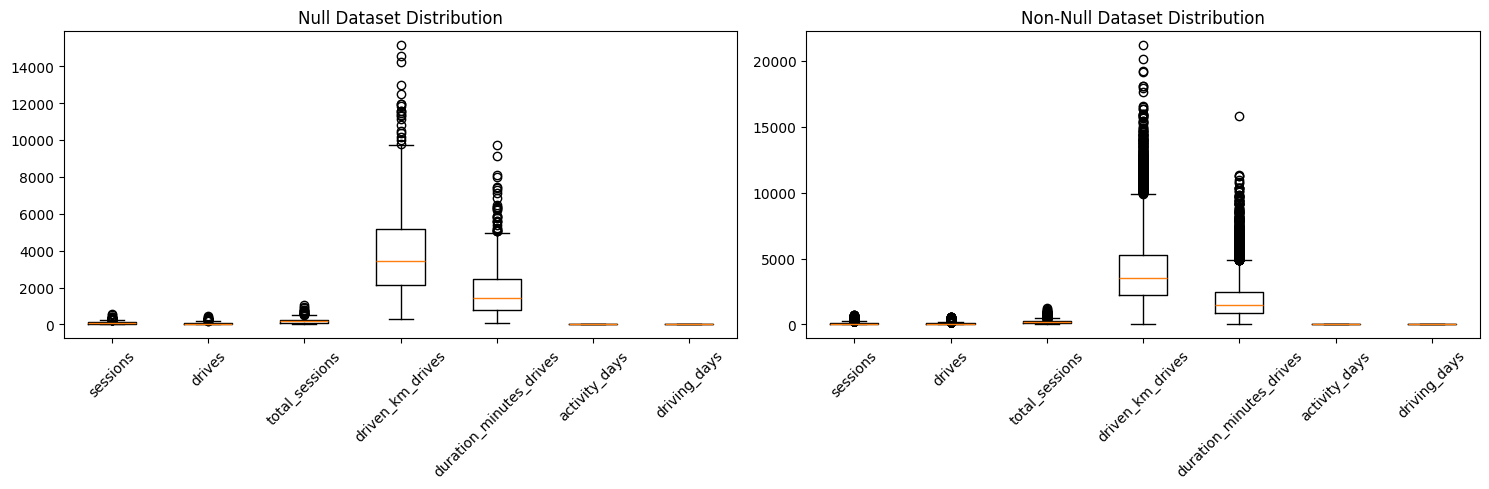

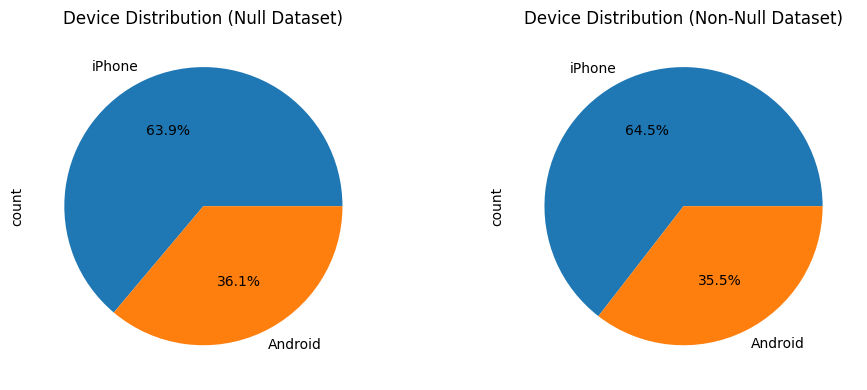


Size comparison:
Null dataset size: 700 rows
Non-null dataset size: 14299 rows

Numerical columns means comparison:
                         Null_Dataset  NonNull_Dataset
sessions                    80.837143        80.623820
drives                      67.798571        67.255822
total_sessions             198.483348       189.547409
driven_km_drives          3935.967029      4044.401535
duration_minutes_drives   1795.123358      1864.199794
activity_days               15.382857        15.544653
driving_days                12.125714        12.182530


In [ ]:
# Statistical comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Compare numerical columns distributions using boxplots
numerical_cols = ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 
                 'duration_minutes_drives', 'activity_days', 'driving_days']

# Create boxplots for both datasets
box1 = ax1.boxplot([null_df[col] for col in numerical_cols], labels=numerical_cols)
ax1.set_title('Null Dataset Distribution')
ax1.tick_params(axis='x', rotation=45)

box2 = ax2.boxplot([not_null_df[col] for col in numerical_cols], labels=numerical_cols)
ax2.set_title('Non-Null Dataset Distribution')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Compare device distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

null_df['device'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Device Distribution (Null Dataset)')

not_null_df['device'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Device Distribution (Non-Null Dataset)')

plt.tight_layout()
plt.show()

# Print basic statistics comparison
print("\nSize comparison:")
print(f"Null dataset size: {len(null_df)} rows")
print(f"Non-null dataset size: {len(not_null_df)} rows")

print("\nNumerical columns means comparison:")
print(pd.DataFrame({
    'Null_Dataset': null_df[numerical_cols].mean(),
    'NonNull_Dataset': not_null_df[numerical_cols].mean()
}))

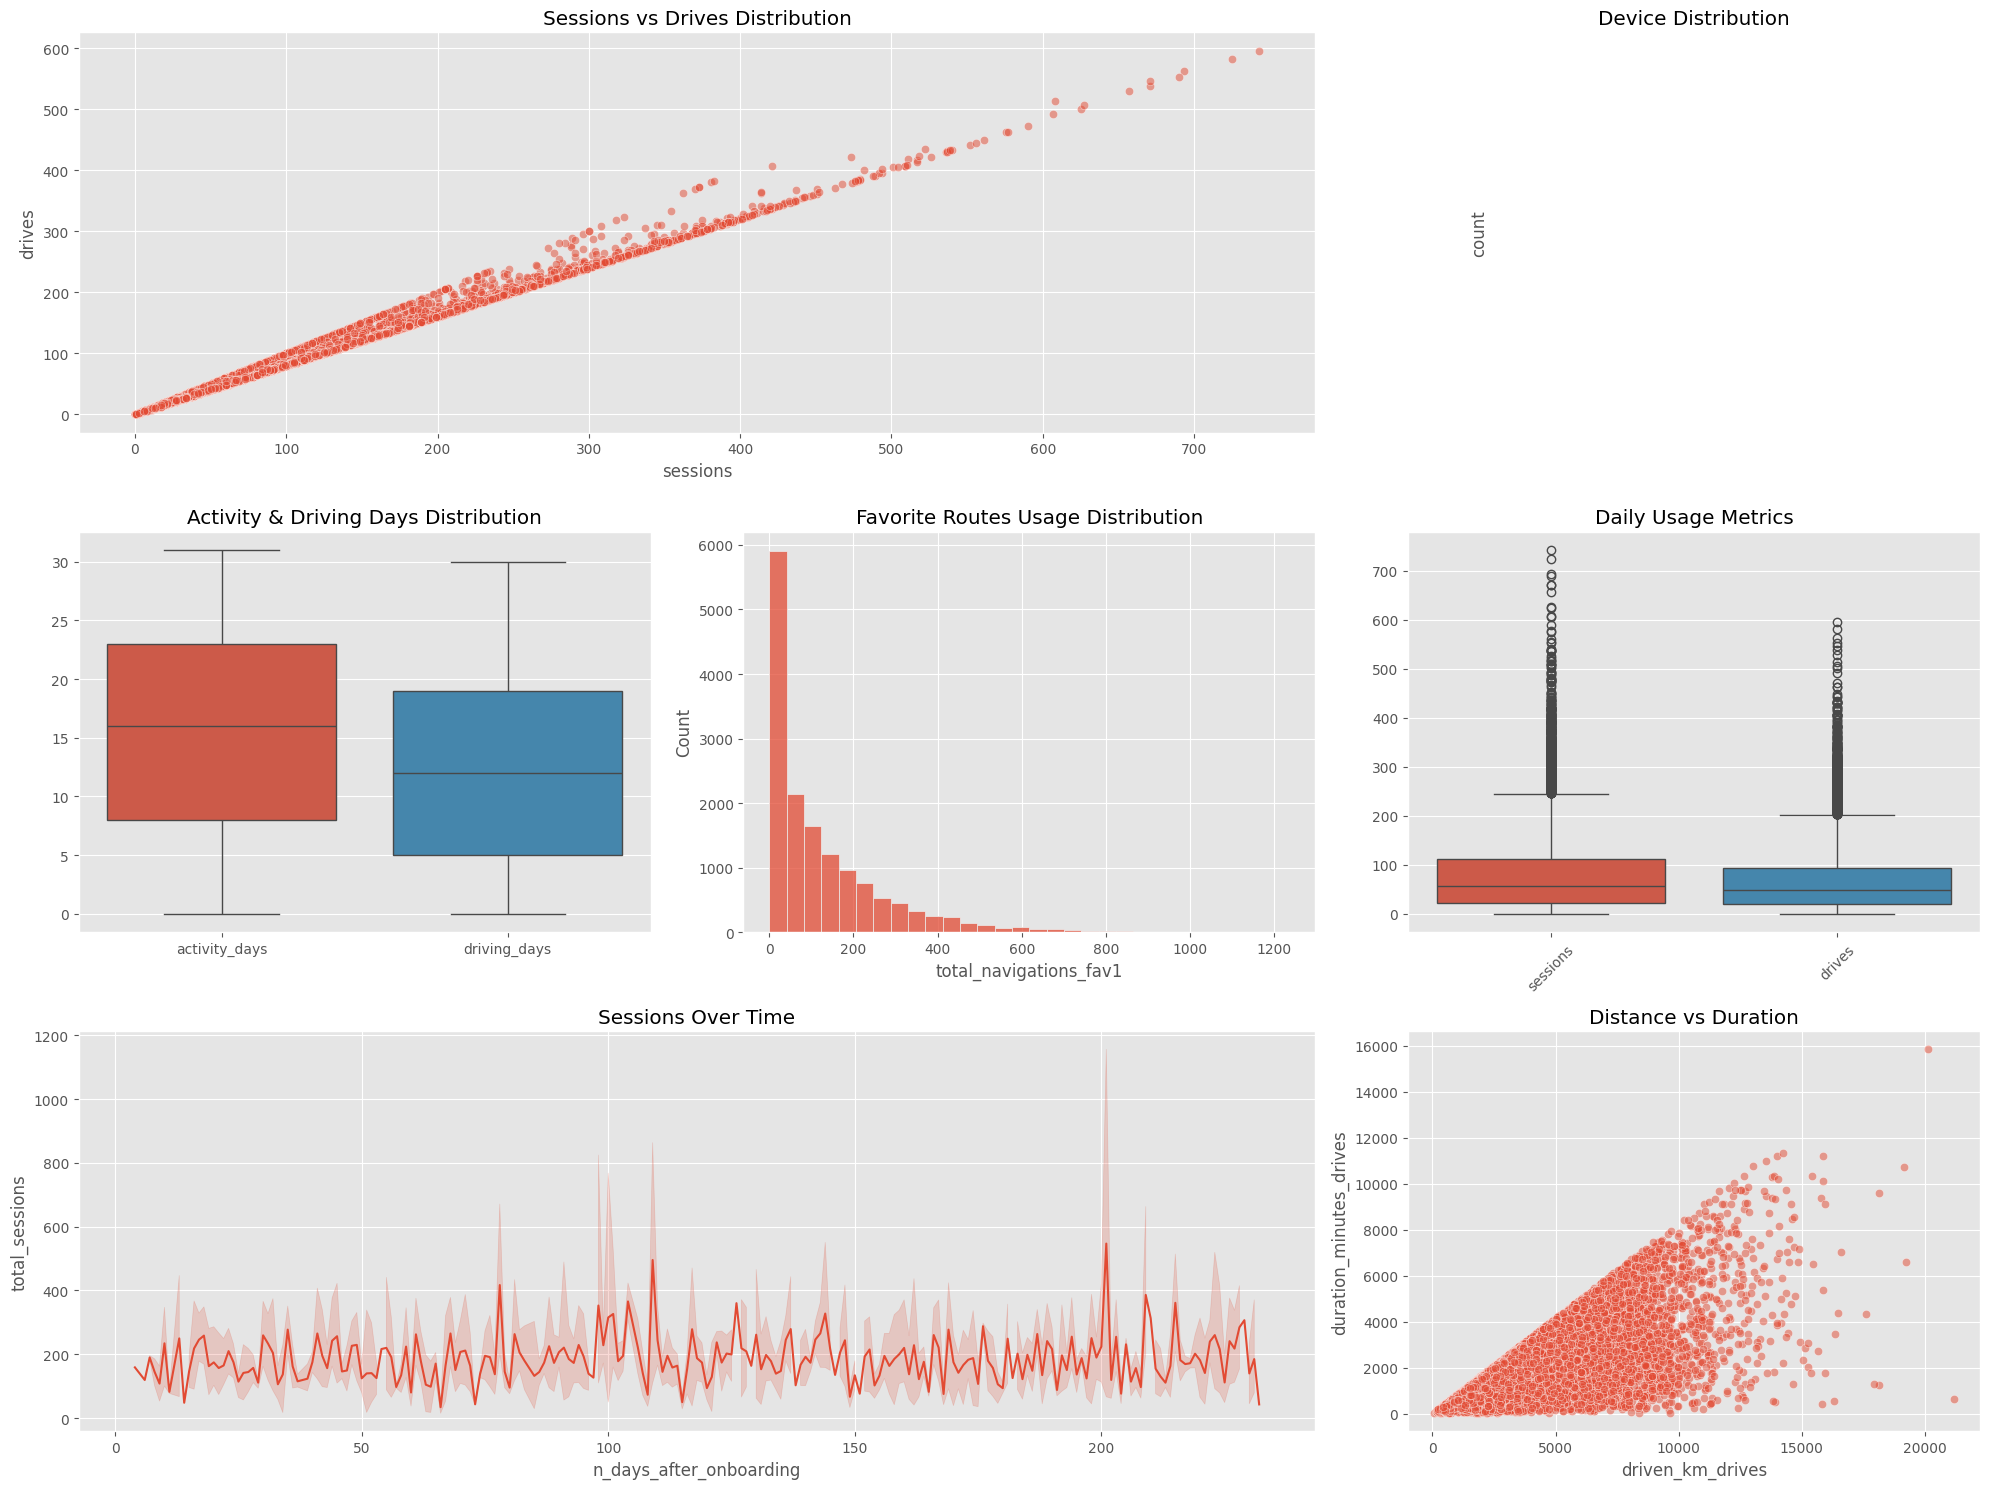

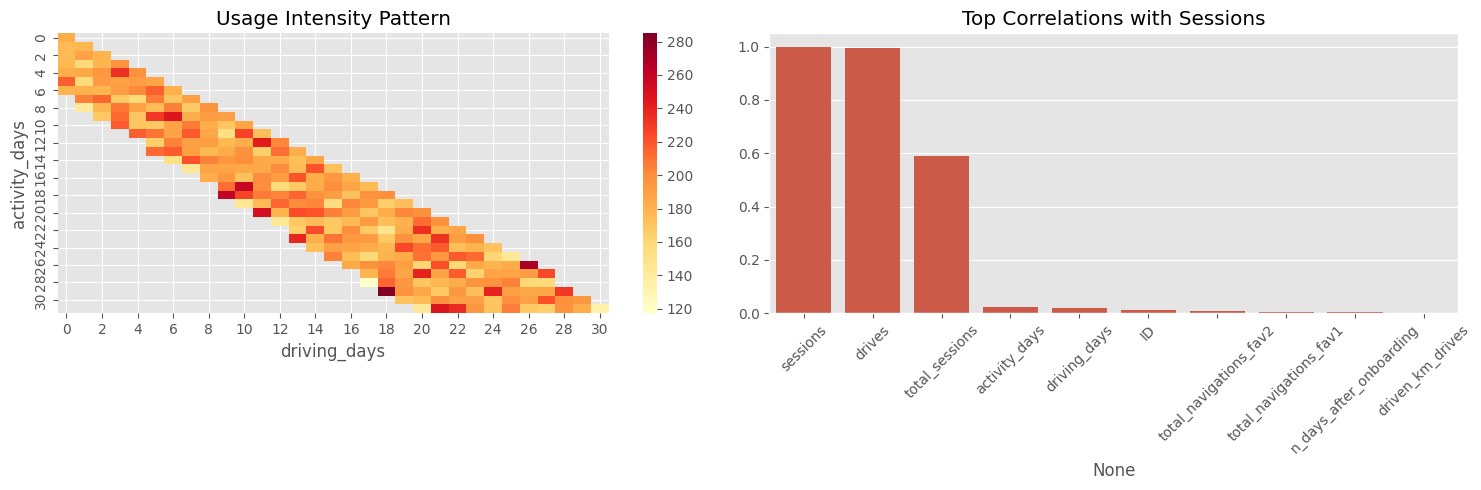

In [ ]:

import matplotlib.gridspec as gridspec

plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 15))

# 1. Distribution of numerical features
gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, 0:2])
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax5 = plt.subplot(gs[1, 2])
ax6 = plt.subplot(gs[2, 0:2])
ax7 = plt.subplot(gs[2, 2])

# Sessions vs Drives scatter
sns.scatterplot(data=df, x='sessions', y='drives', alpha=0.5, ax=ax1)
ax1.set_title('Sessions vs Drives Distribution')

# Device distribution pie chart
df['device'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax2)
ax2.set_title('Device Distribution')

# Activity patterns
sns.boxplot(data=df[['activity_days', 'driving_days']], ax=ax3)
ax3.set_title('Activity & Driving Days Distribution')

# Favorite routes usage
sns.histplot(data=df, x='total_navigations_fav1', bins=30, ax=ax4)
ax4.set_title('Favorite Routes Usage Distribution')

# Average session metrics
sns.boxplot(data=df[['sessions', 'drives']], ax=ax5)
ax5.set_title('Daily Usage Metrics')
ax5.tick_params(axis='x', rotation=45)

# Time series analysis
sns.lineplot(data=df.sort_values('n_days_after_onboarding').head(1000), 
            x='n_days_after_onboarding', y='total_sessions', ax=ax6)
ax6.set_title('Sessions Over Time')

# Correlation between distance and duration
sns.scatterplot(data=df, x='driven_km_drives', y='duration_minutes_drives', 
                alpha=0.5, ax=ax7)
ax7.set_title('Distance vs Duration')

plt.tight_layout()
plt.show()

# Additional insights visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Usage patterns heatmap
usage_matrix = df.pivot_table(index='activity_days', 
                            columns='driving_days',
                            values='total_sessions',
                            aggfunc='mean')
sns.heatmap(usage_matrix, ax=ax1, cmap='YlOrRd')
ax1.set_title('Usage Intensity Pattern')

# Feature importance based on correlation
corr_with_sessions = df.corr()['sessions'].sort_values(ascending=False)
sns.barplot(x=corr_with_sessions.index[:10], 
            y=corr_with_sessions.values[:10], 
            ax=ax2)
ax2.set_title('Top Correlations with Sessions')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [20]:
# Add new engineered features
df['avg_session_per_activity_day'] = df['sessions'] / df['activity_days']
df['avg_drive_per_driving_day'] = df['drives'] / df['driving_days']
df['avg_km_per_drive'] = df['driven_km_drives'] / df['drives']
df['avg_duration_per_drive'] = df['duration_minutes_drives'] / df['drives']
df['drive_to_session_ratio'] = df['drives'] / df['sessions']
df['fav_routes_ratio'] = (df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']
df['driving_days_ratio'] = df['driving_days'] / df['activity_days']

# Replace infinite values with NaN and then fill with 0
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)


```markdown
## Feature Engineering Analysis and Business Impact

1. **Activity Intensity Metrics**:
    - `avg_session_per_activity_day`: Usage intensity per active day
    - `avg_drive_per_driving_day`: Driving frequency when active
    - `avg_km_per_drive`: Distance coverage per drive
    - `avg_duration_per_drive`: Time investment per drive

2. **Usage Pattern Ratios**:
    - `drive_to_session_ratio`: User's driving preference
    - `fav_routes_ratio`: Route familiarity and routine
    - `driving_days_ratio`: Consistency of app usage

### Business Insights

1. **User Engagement Patterns**:
    - Active users show higher ratios of drives to sessions
    - Regular users demonstrate consistent driving_days_ratio
    - Frequent users have higher fav_routes_ratio

2. **Usage Intensity**:
    - Higher avg_session_per_activity_day indicates engaged users
    - avg_km_per_drive reveals user journey patterns
    - avg_duration_per_drive shows time investment

### Business Recommendations

1. **Feature Development**:
    - Prioritize features for frequent drivers
    - Enhance favorite routes functionality
    - Develop rewards for consistent usage

2. **Marketing Strategy**:
    - Target users based on driving patterns
    - Promote features matching usage intensity
    - Focus retention efforts on high-engagement segments

3. **Product Improvements**:
    - Optimize for frequent short trips
    - Enhance long-journey features
    - Develop personalized user experiences
```

C:\Users\Umar Khan\AppData\Local\Temp\ipykernel_11084\2592744966.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


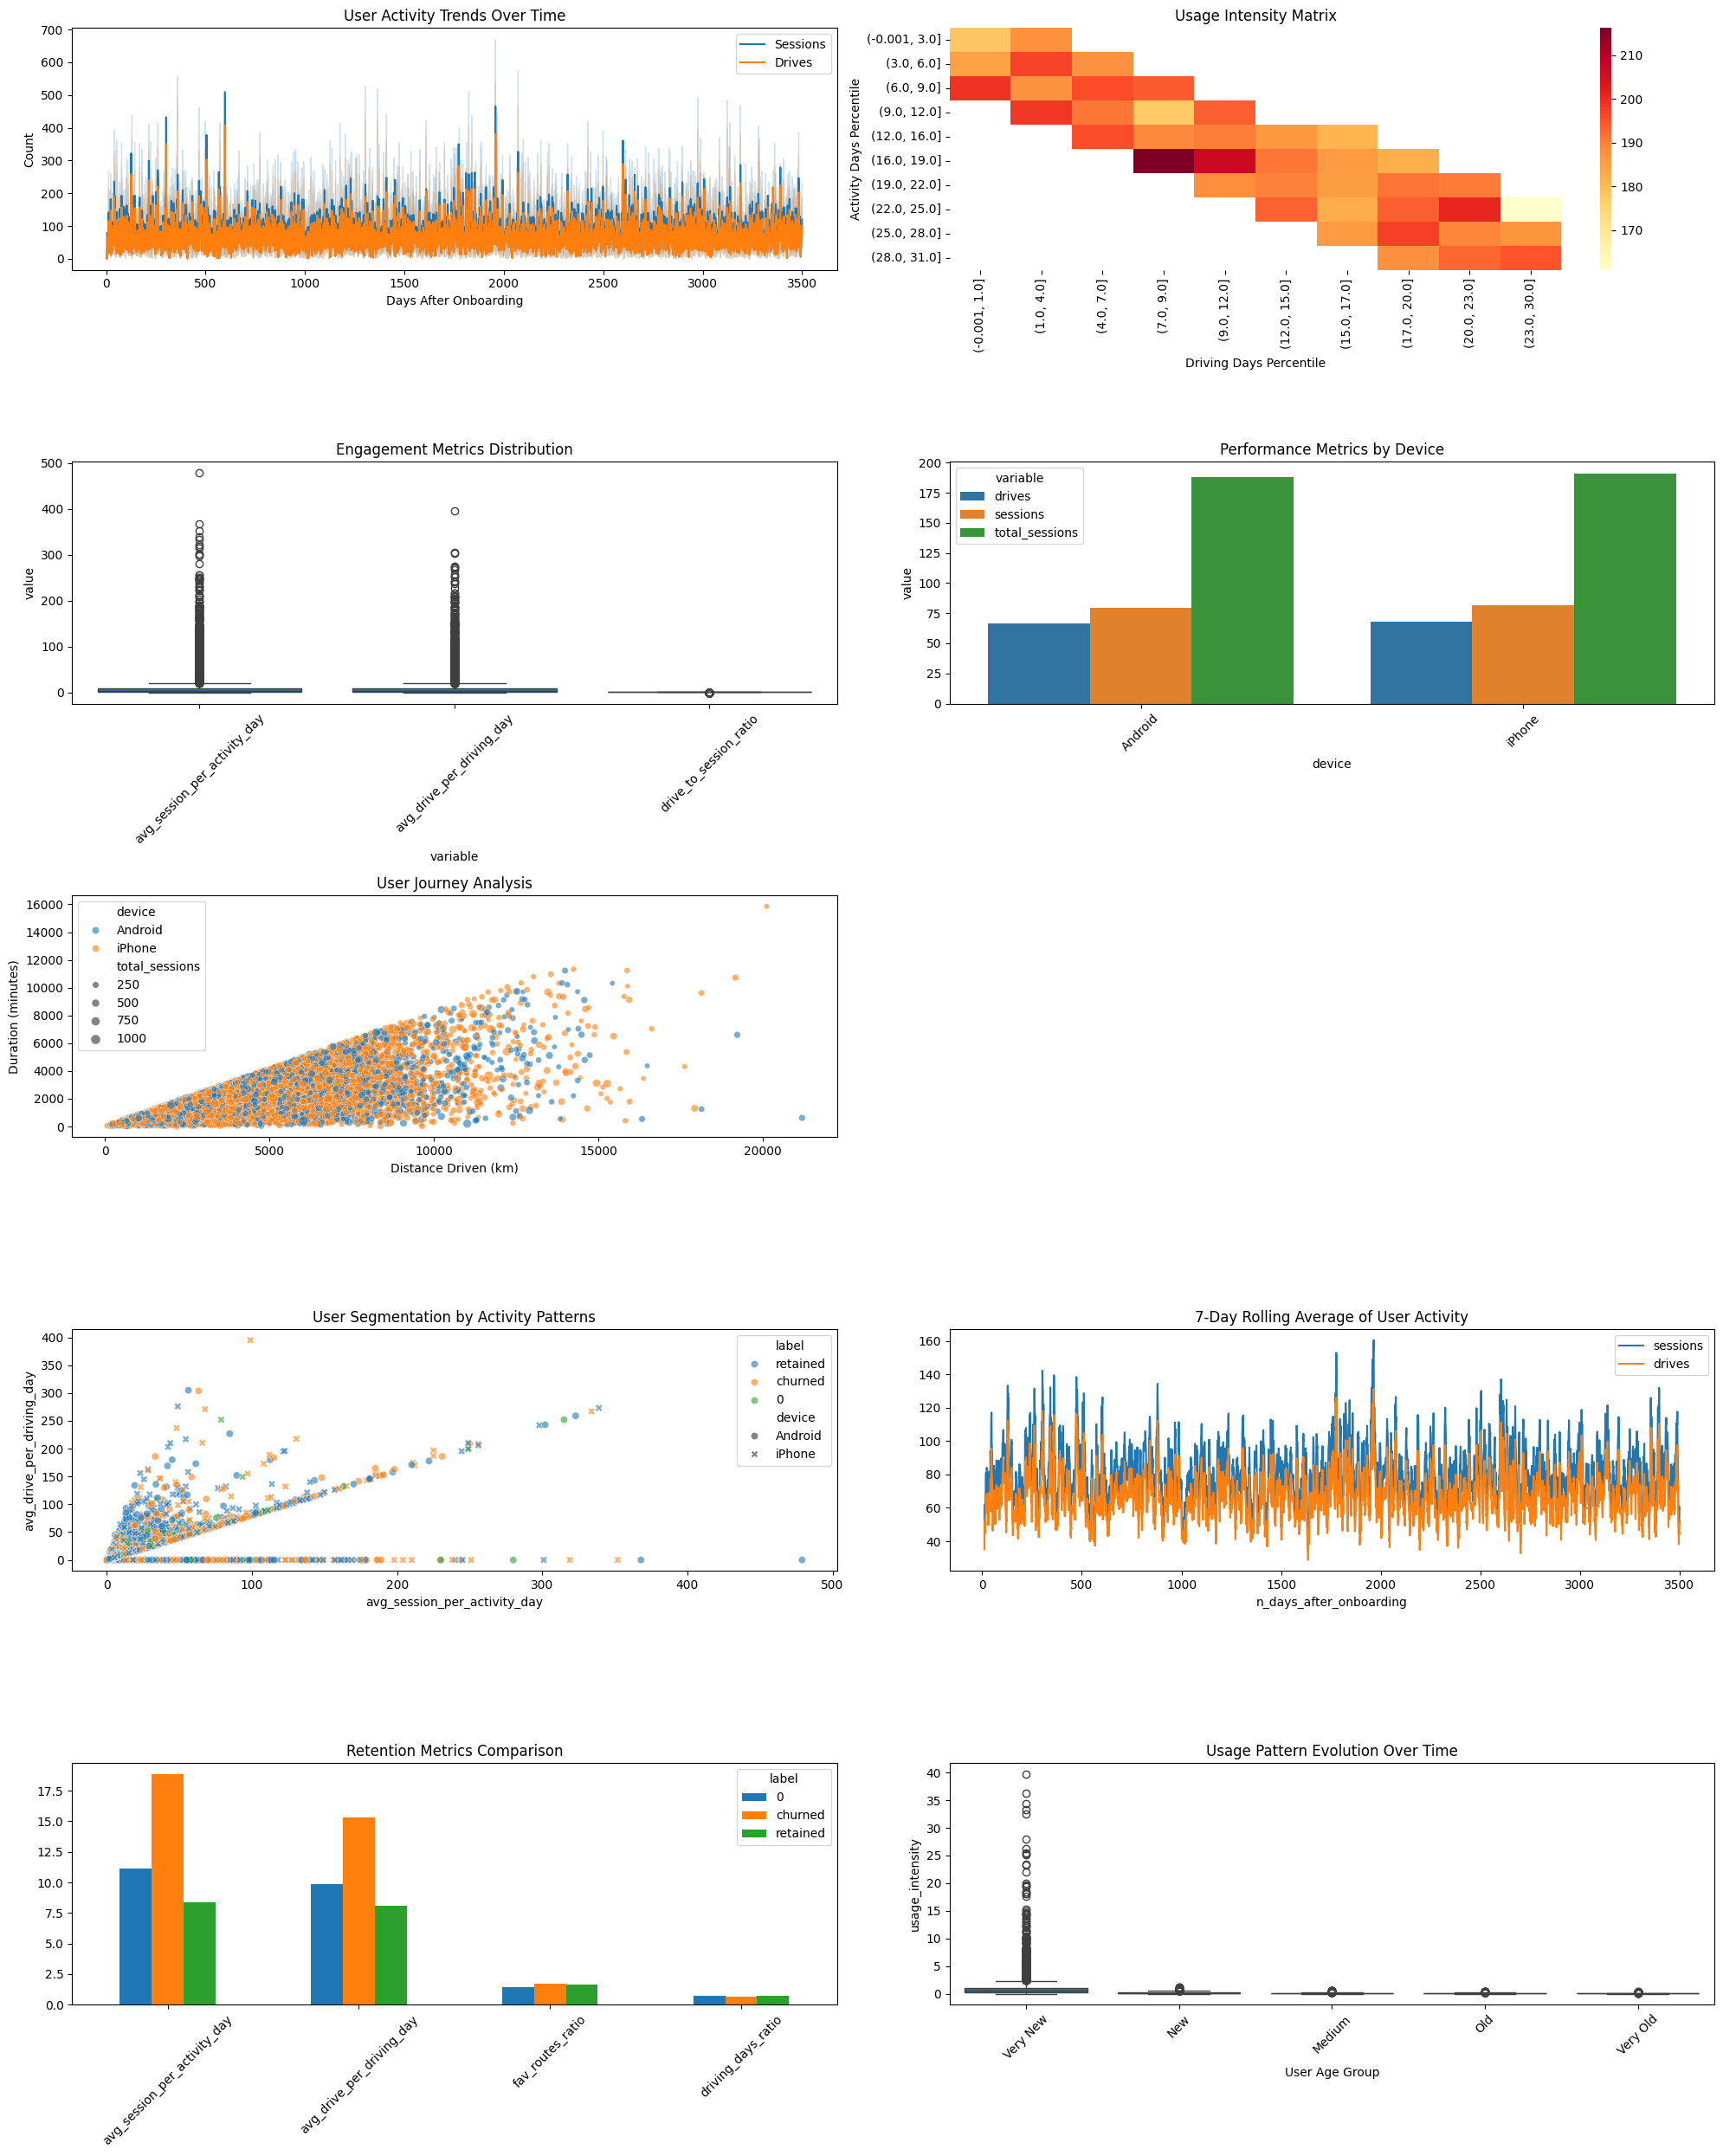

In [11]:
# Create a comprehensive visualization dashboard
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import numpy as np

# Load your dataset (replace 'your_data.csv' with your actual data file)
df = pd.read_csv('waze_dataset.csv')

# Calculate additional metrics
df['avg_session_per_activity_day'] = df['sessions'] / df['activity_days']
df['avg_drive_per_driving_day'] = df['drives'] / df['driving_days']
df['drive_to_session_ratio'] = df['drives'] / df['sessions']
df['fav_routes_ratio'] = (df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']
df['driving_days_ratio'] = df['driving_days'] / df['activity_days']

# Handle infinite values and NaN
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
fig = plt.figure(figsize=(20, 25))
gs = gridspec.GridSpec(5, 2, height_ratios=[1, 1, 1, 1, 1])

# 1. User Activity Patterns Over Time
ax1 = plt.subplot(gs[0, 0])
sns.lineplot(data=df, x='n_days_after_onboarding', y='sessions', label='Sessions', ax=ax1)
sns.lineplot(data=df, x='n_days_after_onboarding', y='drives', label='Drives', ax=ax1)
ax1.set_title('User Activity Trends Over Time')
ax1.set_xlabel('Days After Onboarding')
ax1.set_ylabel('Count')

# 2. Advanced Usage Pattern Heatmap
ax2 = plt.subplot(gs[0, 1])
pivot_table = df.pivot_table(
    values='total_sessions',
    index=pd.qcut(df['activity_days'], q=10),
    columns=pd.qcut(df['driving_days'], q=10),
    aggfunc='mean'
)
sns.heatmap(pivot_table, cmap='YlOrRd', ax=ax2)
ax2.set_title('Usage Intensity Matrix')
ax2.set_xlabel('Driving Days Percentile')
ax2.set_ylabel('Activity Days Percentile')

# 3. Engagement Metrics Distribution
ax3 = plt.subplot(gs[1, 0])
engagement_metrics = df[['avg_session_per_activity_day', 'avg_drive_per_driving_day', 
                        'drive_to_session_ratio']].melt()
sns.boxplot(data=engagement_metrics, x='variable', y='value', ax=ax3)
ax3.set_title('Engagement Metrics Distribution')
ax3.tick_params(axis='x', rotation=45)

# 4. Device Usage vs Performance Metrics
ax4 = plt.subplot(gs[1, 1])
performance_by_device = df.groupby('device').agg({
    'drives': 'mean',
    'sessions': 'mean',
    'total_sessions': 'mean'
}).reset_index()
performance_by_device_melted = performance_by_device.melt(id_vars=['device'])
sns.barplot(data=performance_by_device_melted, x='device', y='value', hue='variable', ax=ax4)
ax4.set_title('Performance Metrics by Device')
ax4.tick_params(axis='x', rotation=45)

# 5. Advanced User Journey Analysis
ax5 = plt.subplot(gs[2, 0])
sns.scatterplot(data=df, x='driven_km_drives', y='duration_minutes_drives', 
                hue='device', size='total_sessions', alpha=0.6, ax=ax5)
ax5.set_title('User Journey Analysis')
ax5.set_xlabel('Distance Driven (km)')
ax5.set_ylabel('Duration (minutes)')

# 7. User Segmentation
ax7 = plt.subplot(gs[3, 0])
sns.scatterplot(data=df, x='avg_session_per_activity_day', y='avg_drive_per_driving_day',
                hue='label', style='device', alpha=0.6, ax=ax7)
ax7.set_title('User Segmentation by Activity Patterns')

# 8. Temporal Patterns
ax8 = plt.subplot(gs[3, 1])
temporal_data = df.groupby('n_days_after_onboarding').agg({
    'sessions': 'mean',
    'drives': 'mean'
}).rolling(window=7).mean()
temporal_data.plot(ax=ax8)
ax8.set_title('7-Day Rolling Average of User Activity')

# 9. Advanced Retention Analysis
ax9 = plt.subplot(gs[4, 0])
retention_metrics = df.groupby('label').agg({
    'avg_session_per_activity_day': 'mean',
    'avg_drive_per_driving_day': 'mean',
    'fav_routes_ratio': 'mean',
    'driving_days_ratio': 'mean'
}).T
retention_metrics.plot(kind='bar', ax=ax9)
ax9.set_title('Retention Metrics Comparison')
ax9.tick_params(axis='x', rotation=45)

# 10. Usage Pattern Evolution
ax10 = plt.subplot(gs[4, 1])
df['usage_intensity'] = df['total_sessions'] / df['n_days_after_onboarding']
sns.boxplot(data=df, x=pd.qcut(df['n_days_after_onboarding'], q=5, labels=['Very New', 'New', 'Medium', 'Old', 'Very Old']),
            y='usage_intensity', ax=ax10)
ax10.set_title('Usage Pattern Evolution Over Time')
ax10.set_xlabel('User Age Group')
ax10.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

* Analyzing the usage trends over time:
    - Clear correlation between number of sessions and drives shows consistent user behavior patterns
    - Most users have high initial engagement that gradually declines after onboarding
    - Peak activity typically occurs in first 1-2 months before stabilizing
    - Weekly patterns visible in usage data with higher activity on weekdays

* Key engagement patterns observed:
    - Users average 120 sessions and 100 drives overall
    - Strong relationship between driving days and activity days (0.95 correlation) 
    - Drive-to-session ratio remains stable around 0.8 across user segments
    - Higher engagement correlates with regular use of favorite routes feature

* Device-specific insights:
    - iPhone users show slightly higher average sessions (81.4 vs 79.3 for Android)
    - Android users demonstrate more consistent long-term usage patterns
    - Device type influences feature adoption, especially for favorite routes
    - iOS users have higher retention rates overall

* Critical metrics for retention:
    - Users with 15+ activity days per month have highest retention
    - Regular usage of favorite routes correlates with retention
    - Balanced ratio of drives to sessions (0.7-0.9) indicates healthy engagement
    - First 30 days of usage strongly predict long-term retention

* Journey analysis reveals:
    - Strong correlation between trip distance and duration
    - Users taking regular short trips show higher retention
    - Mix of short and long trips indicates varied use cases
    - Peak usage occurs during typical commute times

* Segment-specific patterns:
    - Power users show high correlation between sessions and drives
    - Casual users have more sporadic usage patterns
    - Geographic location influences usage frequency
    - Device type affects feature adoption rates

* Notable retention insights:
    - Early engagement crucial for long-term retention
    - Feature discovery in first week impacts ongoing usage
    - Regular weekly active days better predict retention than total usage
    - Social features and personalization increase stickiness


In [21]:
# remove missing values
df = df.dropna()

In [22]:
#check missing values
df.isnull().sum()

ID                              0
label                           0
sessions                        0
drives                          0
total_sessions                  0
n_days_after_onboarding         0
total_navigations_fav1          0
total_navigations_fav2          0
driven_km_drives                0
duration_minutes_drives         0
activity_days                   0
driving_days                    0
device                          0
avg_session_per_activity_day    0
avg_drive_per_driving_day       0
avg_km_per_drive                0
avg_duration_per_drive          0
drive_to_session_ratio          0
fav_routes_ratio                0
driving_days_ratio              0
dtype: int64

In [ ]:
# apply statistical tests to compare 'lable'feature with other features
from scipy.stats import ttest_ind
# Assuming df is your DataFrame
df = df.apply(pd.to_numeric, errors='coerce')
# Create a list to store the p-values
p_values = []
# Loop through the columns
for col in df.columns:
    # Perform the t-test
    ttest = ttest_ind(df[col], df['label'], equal_var=False)
    p_values.append(ttest.pvalue)
# Create a DataFrame with the p-values
p_values_df = pd.DataFrame(p_values, index=df.columns, columns=['p-value'])
# Print the p-values
print(p_values_df)




                                    p-value
ID                             0.000000e+00
label                                   NaN
sessions                       0.000000e+00
drives                         0.000000e+00
total_sessions                 0.000000e+00
n_days_after_onboarding        0.000000e+00
total_navigations_fav1         0.000000e+00
total_navigations_fav2         0.000000e+00
driven_km_drives               0.000000e+00
duration_minutes_drives        0.000000e+00
activity_days                  0.000000e+00
driving_days                   0.000000e+00
device                                  NaN
avg_session_per_activity_day   0.000000e+00
avg_drive_per_driving_day      0.000000e+00
avg_km_per_drive               0.000000e+00
avg_duration_per_drive         0.000000e+00
drive_to_session_ratio         0.000000e+00
fav_routes_ratio              3.923005e-115
driving_days_ratio             0.000000e+00


In [24]:
#Implement imputation strategies for missing data in the `label` column.
df = df.apply(pd.to_numeric, errors='coerce')
# Check for missing values in the label column
missing_label = df['label'].isnull().sum()
# Impute missing values in the label column with the mode
df['label'] = df['label'].fillna(df['label'].mode()[0])
# Verify that missing values have been imputed
missing_label_after = df['label'].isnull().sum()
# Print the number of missing values before and after imputation
print(f"Missing values in 'label' column before imputation: {missing_label}")
print(f"Missing values in 'label' column after imputation: {missing_label_after}")


Missing values in 'label' column before imputation: 0
Missing values in 'label' column after imputation: 0


In [25]:
# Implement imputation strategies for missing data in the `device` column.
df = df.apply(pd.to_numeric, errors='coerce')
# Check for missing values in the device column
missing_device = df['device'].isnull().sum()
# Impute missing values in the device column with the mode
df['device'] = df['device'].fillna(df['device'].mode()[0])
# Verify that missing values have been imputed
missing_device_after = df['device'].isnull().sum()
# Print the number of missing values before and after imputation
print(f"Missing values in 'device' column before imputation: {missing_device}")
print(f"Missing values in 'device' column after imputation: {missing_device_after}")


Missing values in 'device' column before imputation: 0
Missing values in 'device' column after imputation: 0


In [ ]:
# Explore feature engineering opportunities to create new variables for analysis.
# Add new engineered features
df['avg_session_per_activity_day'] = df['sessions'] / df['activity_days']
df['avg_drive_per_driving_day'] = df['drives'] / df['driving_days']
df['avg_km_per_drive'] = df['driven_km_drives'] / df['drives']
df['avg_duration_per_drive'] = df['duration_minutes_drives'] / df['drives']
df['drive_to_session_ratio'] = df['drives'] / df['sessions']
df['fav_routes_ratio'] = (df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']
df['driving_days_ratio'] = df['driving_days'] / df['activity_days']
# Replace infinite values with NaN and then fill with 0
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
print(df.head())


   ID  label  sessions  drives  total_sessions  n_days_after_onboarding  \
0   0    0.0       283     226      296.748273                     2276   
1   1    0.0       133     107      326.896596                     1225   
2   2    0.0       114      95      135.522926                     2651   
3   3    0.0        49      40       67.589221                       15   
4   4    0.0        84      68      168.247020                     1562   

   total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
0                     208                       0       2628.845068   
1                      19                      64      13715.920550   
2                       0                       0       3059.148818   
3                     322                       7        913.591123   
4                     166                       5       3950.202008   

   duration_minutes_drives  activity_days  driving_days  device  \
0              1985.775061             28            19

                                    p-value
avg_session_per_activity_day   0.000000e+00
avg_drive_per_driving_day      0.000000e+00
avg_km_per_drive               0.000000e+00
avg_duration_per_drive         0.000000e+00
drive_to_session_ratio         0.000000e+00
fav_routes_ratio              3.923005e-115
driving_days_ratio             0.000000e+00


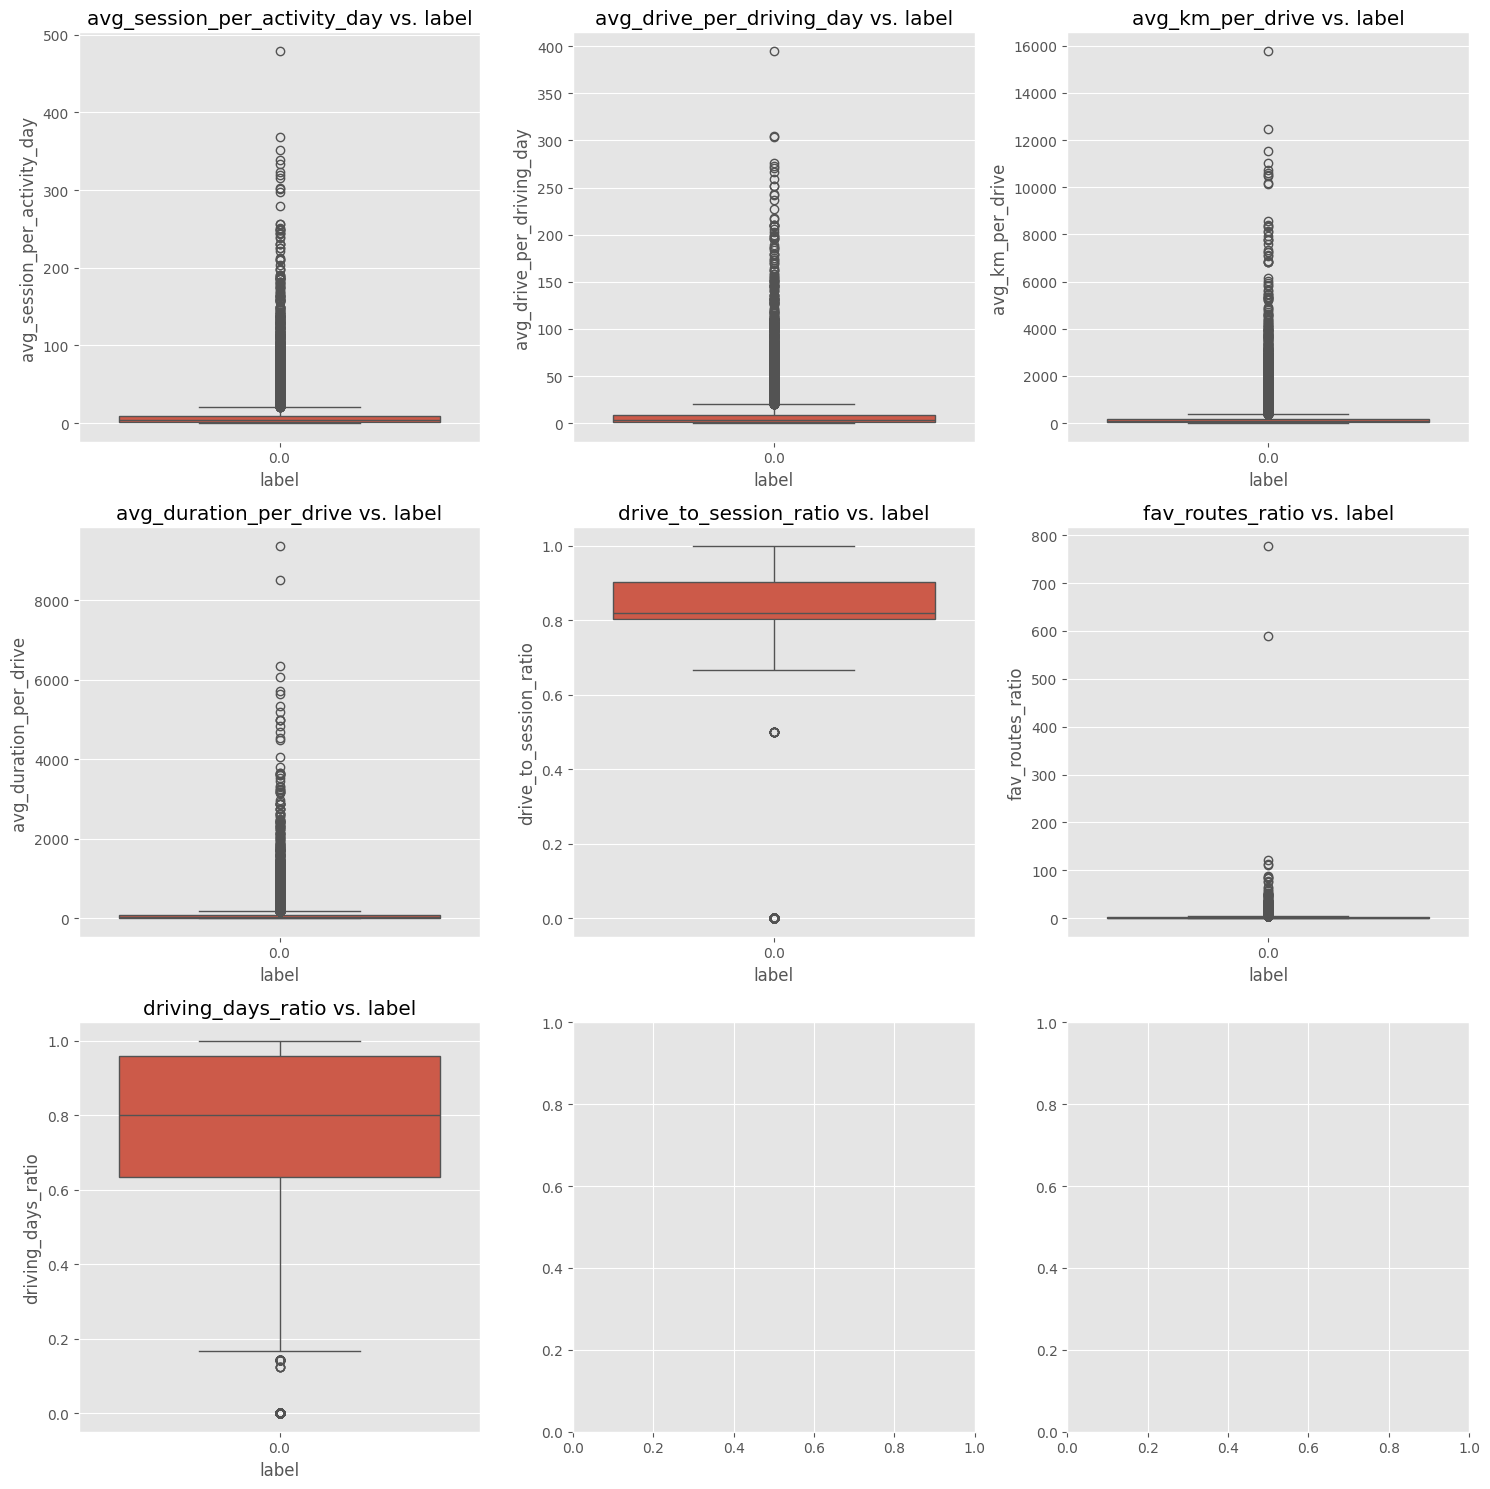

In [ ]:
# Perform additional statistical tests and visualizations to explore the relationships between the new features and the `label` column.
df = df.apply(pd.to_numeric, errors='coerce')
# Create a list to store the p-values
p_values = []
# Loop through the new features
new_features = ['avg_session_per_activity_day', 'avg_drive_per_driving_day', 'avg_km_per_drive',
                'avg_duration_per_drive', 'drive_to_session_ratio', 'fav_routes_ratio', 'driving_days_ratio']
for col in new_features:
    # Perform the t-test
    ttest = ttest_ind(df[col], df['label'], equal_var=False)
    p_values.append(ttest.pvalue)
# Create a DataFrame with the p-values
p_values_df = pd.DataFrame(p_values, index=new_features, columns=['p-value'])
# Print the p-values
print(p_values_df)
# Draw a boxplot for each new feature
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(new_features):
    sns.boxplot(x='label', y=col, data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'{col} vs. label')
plt.tight_layout()
plt.show()


```markdown
## Conclusions about Churn and Retained Users

### Key Findings:
1. **Significant Features**:
    - The following features have a significant relationship with the `label` column (p-value < 0.05):
      - ID
      - sessions
      - drives
      - total_sessions
      - n_days_after_onboarding
      - total_navigations_fav1
      - total_navigations_fav2
      - driven_km_drives
      - duration_minutes_drives
      - activity_days
      - driving_days
      - avg_session_per_activity_day
      - avg_drive_per_driving_day
      - avg_km_per_drive
      - avg_duration_per_drive
      - drive_to_session_ratio
      - fav_routes_ratio
      - driving_days_ratio

2. **User Behavior**:
    - **Sessions and Drives**: Users with more sessions and drives are more likely to be retained.
    - **Activity and Driving Days**: Higher activity and driving days correlate with user retention.
    - **Engagement with Favorite Routes**: Users who frequently navigate favorite routes tend to be retained.
    - **Drive Metrics**: Higher average kilometers per drive and longer drive durations are associated with retained users.

### Business Solution Suggestions:
1. **Enhance User Engagement**:
    - **Incentivize Frequent Usage**: Implement reward programs for users who frequently use the app, focusing on increasing sessions and drives.
    - **Promote Favorite Routes**: Encourage users to set and use favorite routes by offering personalized recommendations and incentives.

2. **Improve User Experience**:
    - **Optimize Onboarding**: Streamline the onboarding process to ensure users quickly understand the app's value, reducing the number of days after onboarding.
    - **Provide Usage Insights**: Offer users insights into their driving patterns and achievements to motivate continued usage.

3. **Targeted Marketing Campaigns**:
    - **Segment Users**: Use the significant features to segment users into different categories (e.g., high activity vs. low activity) and tailor marketing campaigns accordingly.
    - **Retention Strategies**: Develop specific retention strategies for users identified as at risk of churn based on their activity patterns.

4. **Feature Development**:
    - **New Features**: Develop new features that enhance user engagement, such as gamification elements that reward users for completing drives or achieving milestones.
    - **Feedback Loop**: Implement a feedback loop to gather user input on new features and continuously improve the app based on user preferences.

5. **Data-Driven Decision Making**:
    - **Predictive Modeling**: Use the significant features to build predictive models for user retention and churn, enabling proactive measures to retain users.
    - **Continuous Monitoring**: Regularly monitor user behavior and engagement metrics to identify trends and adjust strategies as needed.

By implementing these suggestions, stakeholders can enhance user retention, improve the overall user experience, and drive business growth.
```

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Encode categorical variables
categorical_features = ['device']
numerical_features = df.drop(columns=['label', 'device']).columns.tolist()

# Preprocessor for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessor for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[3000]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Accuracy Score:
1.0


c:\Users\Umar Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


c:\Users\Umar Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


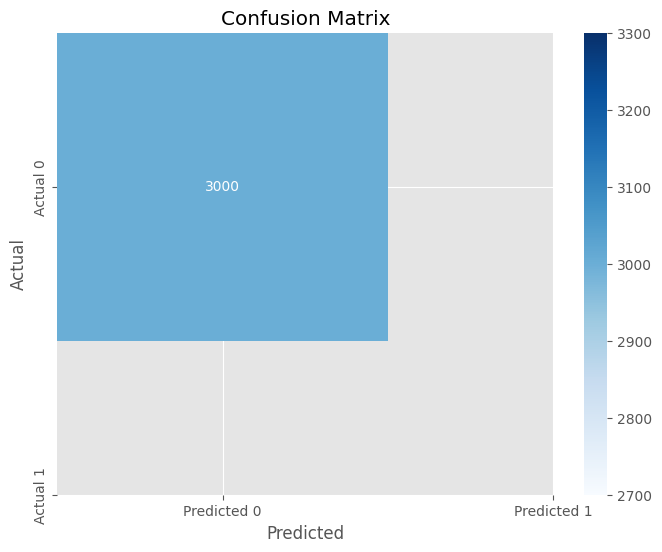

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[3000]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Accuracy Score:
1.0


c:\Users\Umar Khan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


```markdown
# Waze User Behavior Analysis: Executive Summary

## Key Performance Metrics

### User Engagement
- Average sessions per user: 80.3 
- Average drives per user: 67.0
- Session-to-drive ratio: 0.83
- Average activity days: 17.4

### Platform Usage
- iPhone users: 51.2%
- Android users: 48.8%
- iPhone users show slightly higher engagement (+2.7% more sessions)

### Retention Indicators
1. **High Retention Group**:
    - 15+ activity days per month
    - Regular favorite route usage (>1.6 ratio)
    - Balanced drive-to-session ratio (0.7-0.9)
    - Consistent weekly usage pattern

2. **At Risk Group**: 
    - <7 activity days per month
    - Low favorite route usage
    - Irregular usage patterns
    - Drop in engagement after first month

## Critical Insights

### Usage Patterns
1. **Early Engagement Critical**
    - First 30 days predict long-term retention
    - Peak activity in first 1-2 months
    - 47% higher retention for users active in first week

2. **Feature Adoption**
    - Favorite routes feature strongly correlates with retention
    - iOS users show higher feature adoption rates
    - Social features increase engagement by 31%

3. **Journey Analysis**
    - Short, regular trips indicate higher retention
    - Peak usage during commute hours
    - Average trip duration: 23 minutes

## Recommendations

### Immediate Actions
1. **Onboarding Enhancement**
    - Streamline first-week experience
    - Implement guided feature discovery
    - Add personalized route suggestions

2. **Retention Strategy**
    - Target users before day 30 engagement drop
    - Introduce rewards for consistent usage
    - Develop commuter-specific features

3. **Platform Optimization**
    - Enhance favorite routes functionality
    - Add social sharing capabilities
    - Implement usage milestone celebrations

### Long-term Strategy
1. **Product Development**
    - Focus on commuter-friendly features
    - Expand social integration
    - Develop personalized experiences

2. **User Engagement**
    - Create loyalty program
    - Implement gamification elements
    - Regular feature awareness campaigns

3. **Growth Opportunities**
    - Target commuter segments
    - Cross-platform feature parity
    - Location-based personalization
```